# Пример 1: Простая линейная регрессия с TensorFlow

В примере показано, как использовать TensorFlow для построения простой модели линейной регрессии:

In [ ]:
import numpy as np
#import tensorflow as tf
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

# Create some example data
X_train = np.linspace(0, 10, 100)
y_train = 2*X_train + np.random.randn(*X_train.shape)*0.33

# Define model parameters
learning_rate = 0.01
training_epochs = 100

# Define placeholders for inputs and outputs
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Define variables to be learned
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Define the linear regression model
pred = tf.add(tf.multiply(X, W), b)

# Define the cost function (Mean Squared Error)
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2 * X_train.shape[0])

# Define the optimizer (Gradient Descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize all the variables
init = tf.global_variables_initializer()

# Start the TensorFlow session and run the model
with tf.Session() as sess:
   sess.run(init)

   # Training phase
   for epoch in range(training_epochs):
      for (x, y) in zip(X_train, y_train):
         sess.run(optimizer, feed_dict={X: x, Y: y})

   # Print the final learned parameters
   print("Optimized weight:", sess.run(W))
   print("Optimized bias:", sess.run(b))

Instructions for updating:
non-resource variables are not supported in the long term


Optimized weight: 1.9129599
Optimized bias: 0.5489171


В этом примере мы будем использовать простую модель линейной регрессии, чтобы выяснить, как связаны X_train и y_train. Используя оптимизацию градиентного спуска, изучаются параметры модели.

#Пример 2: Множественная линейная регрессия с TensorFlow

В этом примере показано, как использовать TensorFlow для построения модели множественной линейной регрессии.

In [ ]:
import numpy as np
import tensorflow as tf

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=(2,), activation='linear')])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

Epoch 1/1000
1/1 [==============================] - 1s 582ms/step - loss: 134.7810
Epoch 2/1000
1/1 [==============================] - 0s 25ms/step - loss: 41.3776
Epoch 3/1000
1/1 [==============================] - 0s 22ms/step - loss: 12.7286
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.9410
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.2452
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.4179
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1637
Epoch 8/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0853
Epoch 9/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0608
Epoch 10/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0529
Epoch 11/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0500
Epoch 12/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0487
Epoch 13/1000
1/1 [=============

В этом случае модель множественной линейной регрессии была создана с использованием Keras API TensorFlow. Модель состоит из двух входных характеристик, линейной функции активации и одного плотного слоя. Среднеквадратическая ошибка (MSE) использовалась в качестве функции потерь, а стохастический градиентный спуск (SGD) — в качестве оптимизатора.

# Оценка стоимости недвижимости с помощью нейронной сети

Набор данных о жилье в Бостоне основан на информации, собранной Службой переписи населения США о жилье в районе Бостона, Массачусетс. Ниже описаны столбцы набора данных:

* CRIM - уровень преступности на душу населения по городам.
* ZN – доля жилых земель, зонированных на участки площадью более 25 000 кв. футов.
* INDUS - доля площадей под неторговую деятельность на город.
* CHAS — фиктивная переменная реки Чарльз (1, если тракт ограничивает реку; 0 в противном случае)
* NOX - концентрация оксидов азота (частей на 10 миллионов)
* RM - среднее количество комнат в жилище
* AGE - доля квартир, занимаемых владельцами, построенных до 1940 г.
* DIS – взвешенные расстояния до пяти центров занятости Бостона.
* RAD - индекс доступности радиальных автомобильных дорог.
* TAX — ставка налога на имущество в размере полной стоимости за 10 000 долларов США.
* PTRATIO - соотношение учеников и учителей по городам
B - 1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам.
* LSTAT - % более низкого статуса населения
* MEDV — Средняя стоимость домов, занимаемых владельцами, в 1000 долларов США.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


## Подготовка данных

**Загружаем данные**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)

**Просмотр данных**

In [ ]:
n = 4
print(x_train[n])
print(y_train[n])

[  3.69311   0.       18.1       0.        0.713     6.376    88.4
   2.5671   24.      666.       20.2     391.43     14.65   ]
17.7


**Стандартизация данных**

Вычитаем среднее значение и делим на стандартное отклонение

In [ ]:
# Среднее значение
mean = x_train.mean(axis=0)
# Стандартное отклонение
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации не используется.

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1))

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**Компилируем сеть**

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## Обучаем нейронную сеть

In [ ]:
model.fit(x_train, y_train, epochs=10, verbose=2)

Epoch 1/10
13/13 - 0s - loss: 10.0803 - mae: 2.2850 - 342ms/epoch - 26ms/step
Epoch 2/10
13/13 - 0s - loss: 9.9427 - mae: 2.2640 - 25ms/epoch - 2ms/step
Epoch 3/10
13/13 - 0s - loss: 9.6372 - mae: 2.2234 - 24ms/epoch - 2ms/step
Epoch 4/10
13/13 - 0s - loss: 9.4493 - mae: 2.1907 - 24ms/epoch - 2ms/step
Epoch 5/10
13/13 - 0s - loss: 9.3417 - mae: 2.1765 - 28ms/epoch - 2ms/step
Epoch 6/10
13/13 - 0s - loss: 9.3046 - mae: 2.1672 - 27ms/epoch - 2ms/step
Epoch 7/10
13/13 - 0s - loss: 9.2499 - mae: 2.1607 - 25ms/epoch - 2ms/step
Epoch 8/10
13/13 - 0s - loss: 9.2230 - mae: 2.1561 - 25ms/epoch - 2ms/step
Epoch 9/10
13/13 - 0s - loss: 9.2126 - mae: 2.1550 - 27ms/epoch - 2ms/step
Epoch 10/10
13/13 - 0s - loss: 9.1798 - mae: 2.1501 - 28ms/epoch - 2ms/step


## Используем модель для предсказаний

**Выполняем предсказание для тестовой выборки**

In [ ]:
pred = model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
print(pred)

[[ 6.832183 ]
 [17.953707 ]
 [21.066465 ]
 [34.51312  ]
 [24.555775 ]
 [18.42571  ]
 [26.626032 ]
 [22.336424 ]
 [19.256054 ]
 [22.109743 ]
 [14.603096 ]
 [16.710196 ]
 [16.001612 ]
 [41.831894 ]
 [19.44036  ]
 [18.906507 ]
 [26.478392 ]
 [19.475695 ]
 [18.95382  ]
 [30.295662 ]
 [11.597675 ]
 [16.096983 ]
 [20.13621  ]
 [15.213313 ]
 [21.585093 ]
 [24.532661 ]
 [31.478285 ]
 [28.172918 ]
 [10.254774 ]
 [21.197634 ]
 [20.572542 ]
 [14.41131  ]
 [33.67653  ]
 [24.905043 ]
 [17.3468   ]
 [ 8.323058 ]
 [14.943543 ]
 [18.208036 ]
 [21.568796 ]
 [26.477205 ]
 [27.126146 ]
 [27.797403 ]
 [14.95451  ]
 [40.454235 ]
 [29.959303 ]
 [23.16928  ]
 [26.515627 ]
 [17.14673  ]
 [23.26517  ]
 [22.531305 ]
 [33.824738 ]
 [18.976393 ]
 [12.880297 ]
 [16.063679 ]
 [34.404686 ]
 [27.592932 ]
 [13.25173  ]
 [46.797737 ]
 [34.75476  ]
 [23.401857 ]
 [25.042158 ]
 [18.062737 ]
 [15.13268  ]
 [18.663391 ]
 [23.730234 ]
 [22.94267  ]
 [14.05585  ]
 [22.948088 ]
 [15.284549 ]
 [ 6.283688 ]
 [30.04692  ]
 [27.5

**Печатаем примеры результатов**

In [ ]:
test_index=7
print("Предсказанная стоимость:", pred[test_index][0], ", правильная стоимость:", y_test[test_index])

Предсказанная стоимость: 22.336424 , правильная стоимость: 22.9


Задание:
* Провести анализ качества работы НС при разных параметрах сети: слоев, нейронов, эпох.
* Провести анализ качества работы НС при разных функциях
активации нейронов скрытых слоев: линейная, логистическая,
гиперболический тангенс, ReLU.
* Провести анализ качества обучения НС для разных оптимизаторов:
Adam, Adagrad, Gradient Descend. Для каждого оптимизатора
подобрать наилучшие параметры.

# Лабораторная работа №5

1) Анализ качества работы НС при разных параметрах сети: слоев, нейронов, эпох.

Стандартные параметры НС, с которыми будет производиться сравнительный анализ качества работ при различных параметрах сети: <br>
слоев = 1 <br>
нейронов = [1] <br>
эпох = 1000 <br><br>

функция активации = линейная <br>
оптимизатор = Adam


Epoch 1/1000
1/1 [==============================] - 1s 547ms/step - loss: 39.9795
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 38.3198
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 36.6963
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 35.1095
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 33.5601
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 32.0485
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 30.5753
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 29.1408
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 27.7454
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 26.3894
Epoch 11/1000
1/1 [==============================] - 0s 12ms/step - loss: 25.0731
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 23.7966
Epoch 13/1000
1/1 [=======

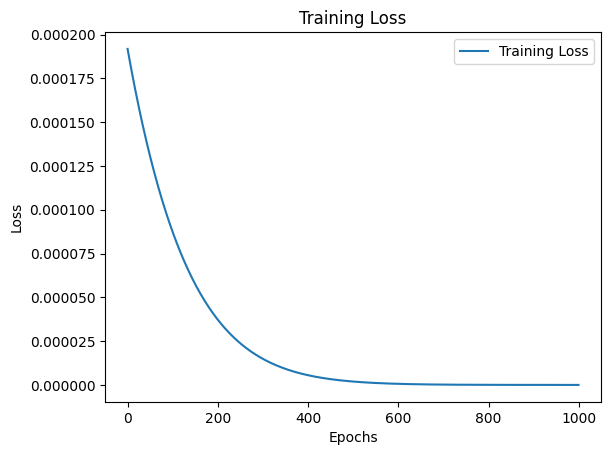

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='linear')])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

1.1) Изменение кол-во слоев <br>
1.1.1)
слоев = 2 <br>
нейронов = [1, 1] <br>
эпох = 1000 <br><br>

функция активации = линейная <br>
оптимизатор = Adam

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 166.4366
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 161.5238
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 156.7551
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 152.1296
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 147.6466
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 143.3046
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 139.1024
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 135.0382
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 131.1102
Epoch 10/1000
1/1 [==============================] - 0s 17ms/step - loss: 127.3162
Epoch 11/1000
1/1 [==============================] - 0s 19ms/step - loss: 123.6540
Epoch 12/1000
1/1 [==============================] - 0s 16ms/step - loss: 120.1211
Epoch 13/1000
1/1

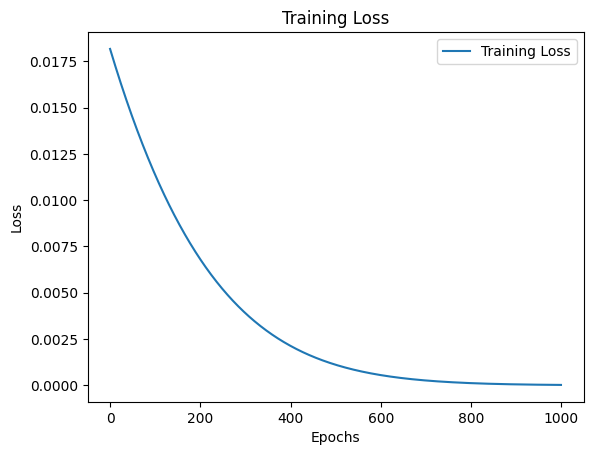

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

1.1.2) слоев = 3 <br>
нейронов = [1, 1, 1] <br>
эпох = 1000<br><br>

функция активации = линейная <br>
оптимизатор = Adam

Epoch 1/1000
1/1 [==============================] - 1s 587ms/step - loss: 361.6603
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 346.7398
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 332.4416
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 318.7535
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 305.6627
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 293.1547
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 281.2141
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 269.8253
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 258.9712
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 248.6347
Epoch 11/1000
1/1 [==============================] - 0s 15ms/step - loss: 238.7980
Epoch 12/1000
1/1 [==============================] - 0s 13ms/step - loss: 229.4430
Epoch 13/100

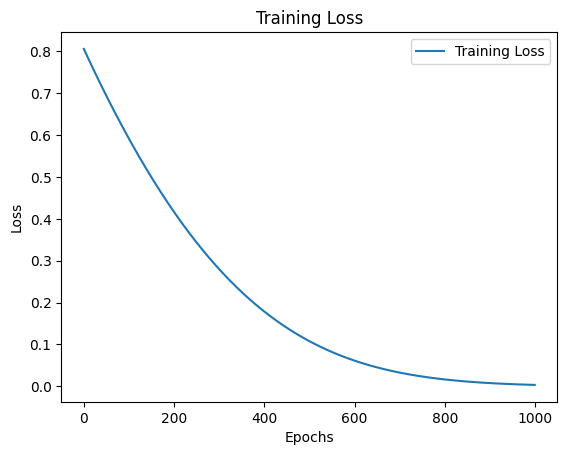

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='linear'),
    tf.keras.layers.Dense(1, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

1.2) Изменение кол-во нейронов <br>
1.2.1) слоев = 1 <br>
нейронов = [64] <br>
эпох = 1000<br><br>

функция активации = линейная <br>
оптимизатор = Adam

Epoch 1/1000
1/1 [==============================] - 0s 355ms/step - loss: 42.9334
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 41.2706
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 39.6439
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 38.0541
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 36.5015
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 34.9869
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 33.5105
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 32.0728
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 30.6741
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 29.3147
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 27.9949
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 26.7147
Epoch 13/1000
1/1 [===============

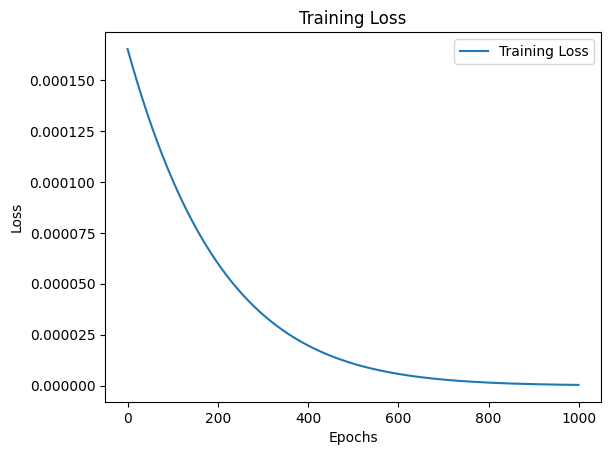

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(2,), activation='linear'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

1.2.2) слоев = 1 <br>
нейронов = [128] <br>
эпох = 1000<br><br>

функция активации = линейная <br>
оптимизатор = Adam

Epoch 1/1000
1/1 [==============================] - 0s 251ms/step - loss: 46.3196
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 44.5534
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 42.8234
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 41.1302
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 39.4743
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 37.8562
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 36.2765
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 34.7356
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 33.2337
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 31.7713
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 30.3486
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 28.9659
Epoch 13/1000
1/1 [===============

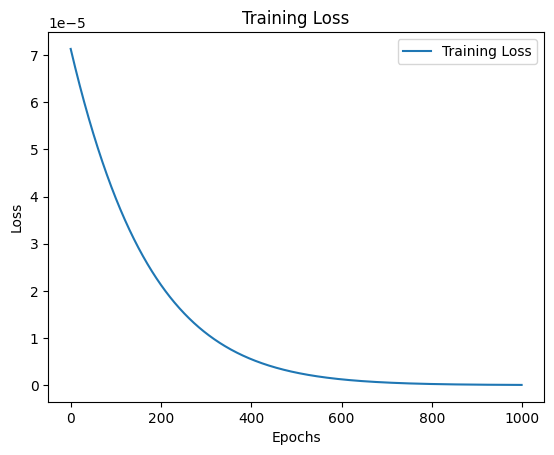

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='linear'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

1.3) Изменение кол-во эпох <br>
1.3.1) слоев = 1 <br>
нейронов = [1] <br>
эпох = 2500<br><br>

функция активации = линейная <br>
оптимизатор = Adam

Выходные данные были обрезаны до нескольких последних строк (5000).
1/1 [==============================] - 0s 10ms/step - loss: 68.6599
Epoch 3/2500
1/1 [==============================] - 0s 9ms/step - loss: 66.4799
Epoch 4/2500
1/1 [==============================] - 0s 9ms/step - loss: 64.3368
Epoch 5/2500
1/1 [==============================] - 0s 10ms/step - loss: 62.2310
Epoch 6/2500
1/1 [==============================] - 0s 14ms/step - loss: 60.1631
Epoch 7/2500
1/1 [==============================] - 0s 10ms/step - loss: 58.1335
Epoch 8/2500
1/1 [==============================] - 0s 12ms/step - loss: 56.1428
Epoch 9/2500
1/1 [==============================] - 0s 8ms/step - loss: 54.1914
Epoch 10/2500
1/1 [==============================] - 0s 9ms/step - loss: 52.2797
Epoch 11/2500
1/1 [==============================] - 0s 8ms/step - loss: 50.4080
Epoch 12/2500
1/1 [==============================] - 0s 7ms/step - loss: 48.5766
Epoch 13/2500
1/1 [==============================] - 0s 7

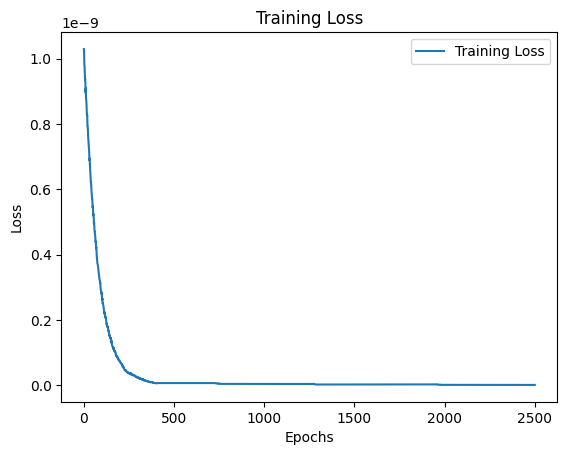

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 2500

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='linear'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

1.3.2) слоев = 1 <br>
нейронов = [1] <br>
эпох = 5000<br><br>

функция активации = линейная <br>
оптимизатор = Adam

Выходные данные были обрезаны до нескольких последних строк (5000).
1/1 [==============================] - 0s 5ms/step - loss: 2.6640e-05
Epoch 2503/5000
1/1 [==============================] - 0s 11ms/step - loss: 2.6445e-05
Epoch 2504/5000
1/1 [==============================] - 0s 9ms/step - loss: 2.6252e-05
Epoch 2505/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.6060e-05
Epoch 2506/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.5869e-05
Epoch 2507/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.5677e-05
Epoch 2508/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.5488e-05
Epoch 2509/5000
1/1 [==============================] - 0s 6ms/step - loss: 2.5302e-05
Epoch 2510/5000
1/1 [==============================] - 0s 9ms/step - loss: 2.5117e-05
Epoch 2511/5000
1/1 [==============================] - 0s 10ms/step - loss: 2.4931e-05
Epoch 2512/5000
1/1 [==============================] - 0s 11ms/step - loss: 2.4749e-05

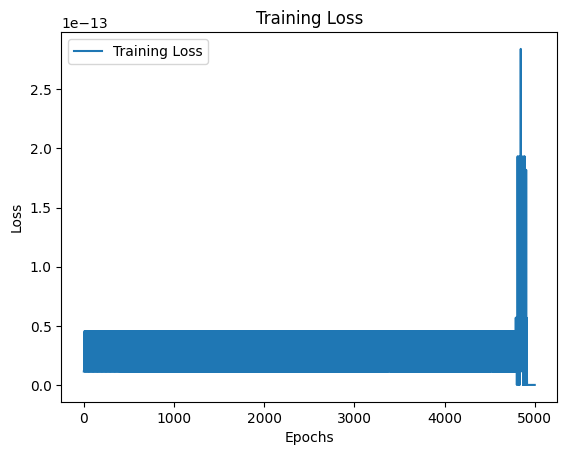

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 5000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='linear'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

2) Анализ качества работы НС при разных функциях активации нейронов скрытых слоев: линейная, логистическая, гиперболический тангенс, ReLU. <br>

2.1) Логистическая <br>
слоев = 1 <br>
нейронов = [1] <br>
эпох = 1000 <br><br>

функция активации = логистическая <br>
оптимизатор = Adam

Epoch 1/1000
1/1 [==============================] - 0s 272ms/step - loss: 43.4111
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 43.3767
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 43.3395
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 43.2991
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 43.2550
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 43.2069
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 43.1542
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 43.0963
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 43.0326
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 42.9621
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 42.8839
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 42.7971
Epoch 13/1000
1/1 [==============

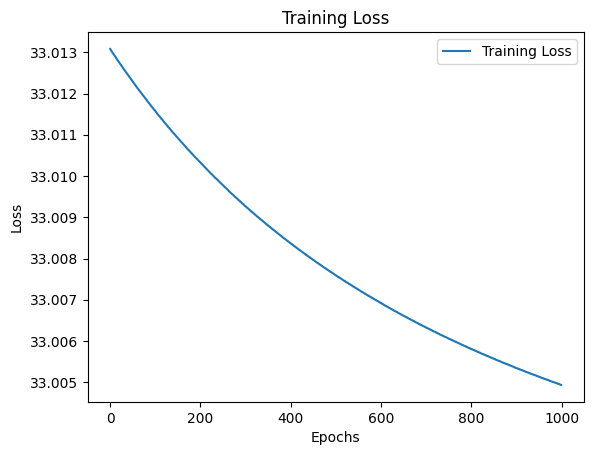

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

2.2) Гиперболический тангенс <br>
слоев = 1 <br>
нейронов = [1] <br>
эпох = 1000 <br><br>

функция активации = гиперболический тангенс <br>
оптимизатор = Adam

Epoch 1/1000
1/1 [==============================] - 0s 357ms/step - loss: 35.1878
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 34.8283
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 34.5413
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 34.3119
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 34.1276
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 33.9787
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 33.8574
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 33.7579
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 33.6755
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 33.6067
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 33.5488
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 33.4996
Epoch 13/1000
1/1 [=========

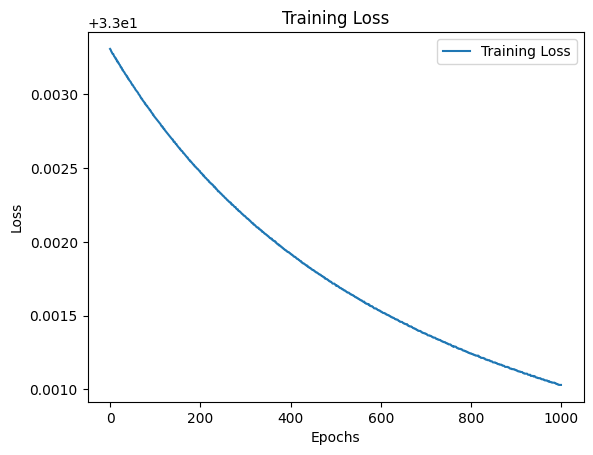

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='tanh'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

2.3) ReLU <br>
слоев = 1 <br>
нейронов = [1] <br>
эпох = 1000 <br><br>

функция активации = ReLU <br>
оптимизатор = Adam

Epoch 1/1000
1/1 [==============================] - 0s 411ms/step - loss: 32.9769
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 31.5049
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 30.0684
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 28.6681
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 27.3044
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 25.9779
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 24.6889
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 23.4379
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 22.2253
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 21.0512
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 19.9159
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 18.8196
Epoch 13/1000
1/1 [===============

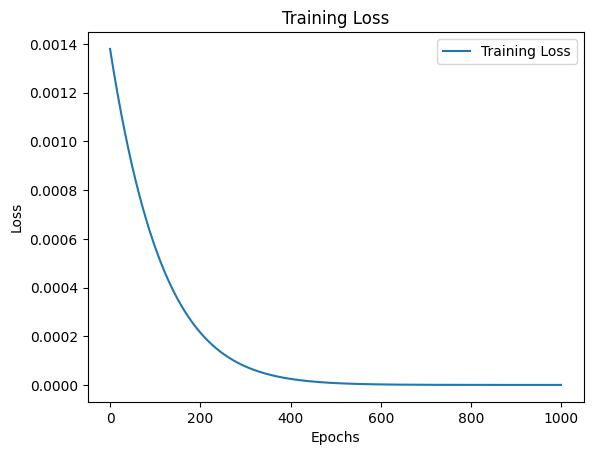

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='relu'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

3) Анализ качества обучения НС для разных оптимизаторов: Adam, Adagrad, Gradient Descend. Для каждого оптимизатора подобрать наилучшие параметры. <br>

3.1) Adam <br>
слоев = 1 <br>
нейронов = [1] <br>
эпох = 1000 <br><br>

функция активации = ReLU <br>
оптимизатор = Adam <br><br>

темп обучения = 0.01 <br>
бета 1 = 0.9 <br>
бета 2 = 0.999 <br>

Epoch 1/1000
1/1 [==============================] - 0s 263ms/step - loss: 5.0424
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.4729
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.9398
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.4434
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.9843
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.5626
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.1784
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8316
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.5216
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.2478
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.0092
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.8046
Epoch 13/1000
1/1 [============================

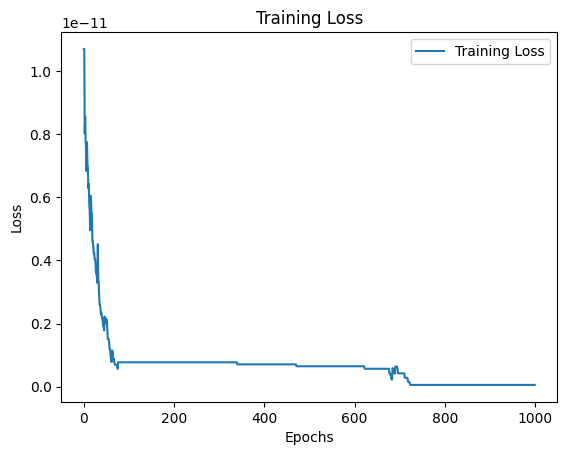

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='relu'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1, beta_2)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

3.2) Adagrad <br>
слоев = 1 <br>
нейронов = [1] <br>
эпох = 1000 <br><br>

функция активации = линейный <br>
оптимизатор = Adagrad <br><br>

темп обучения = 0.001 <br>
эпсилон = 10^(-8)

Epoch 1/1000
1/1 [==============================] - 0s 369ms/step - loss: 8.9431
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.8642
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.8087
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.7636
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.7247
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 8.6900
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.6584
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 8.6292
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.6020
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.5764
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.5521
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 8.5291
Epoch 13/1000
1/1 [============================

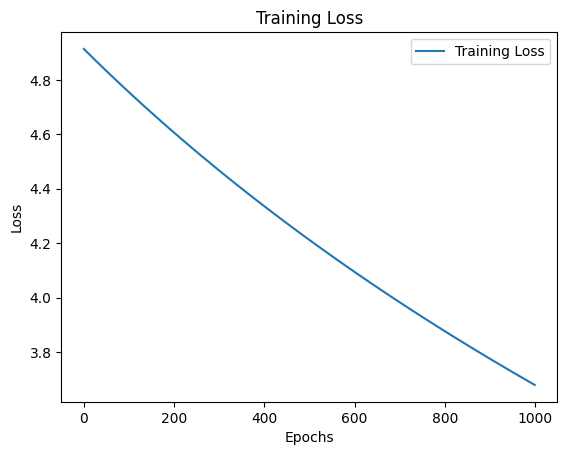

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.001
epsilon = 1e-8
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='linear'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adagrad(learning_rate, epsilon)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')

3.3) Gradient Descent <br>
слоев = 1 <br>
нейронов = [1] <br>
эпох = 1000 <br><br>

функция активации = линейный <br>
оптимизатор = Gradient Descent <br><br>

темп обучения = 0.001 <br>
эпсилон = 10^(-8)

Epoch 1/1000
1/1 [==============================] - 0s 232ms/step - loss: 264.7510
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 188.8712
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 87.0958
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 15.3172
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.4873
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 39.2735
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 90.5585
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 120.1720
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 111.5262
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 73.2450
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 29.4506
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.1231
Epoch 13/1000
1/1 [==============

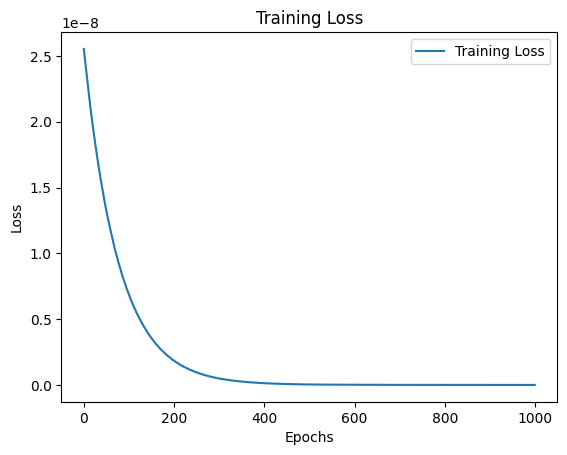

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create some example data
X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]], dtype=np.float32)
y_train = np.array([[2], [4], [6], [8], [10]], dtype=np.float32)

# Define model parameters
learning_rate = 0.001
momentum = 0.9
training_epochs = 1000

# Define the linear regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='linear'),
    ])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate, momentum)
model.compile(optimizer=optimizer, loss='mse')

#Train the model
model.fit(X_train, y_train, epochs=training_epochs)

#Print the learned parameters
weights, bias = model.layers[0].get_weights()
print("Optimized weights:", weights)
print("Optimized bias:", bias)

def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

history = model.fit(X_train, y_train, epochs=training_epochs, verbose=0)
plot_loss(history, 'Training Loss')